# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Arda Deniz Ayyıldız
## Student ID: 2210765018

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [2]:
missing_values = housing_df.isnull().sum()
missing_values
#Only "total_bedrooms" column have missing values.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

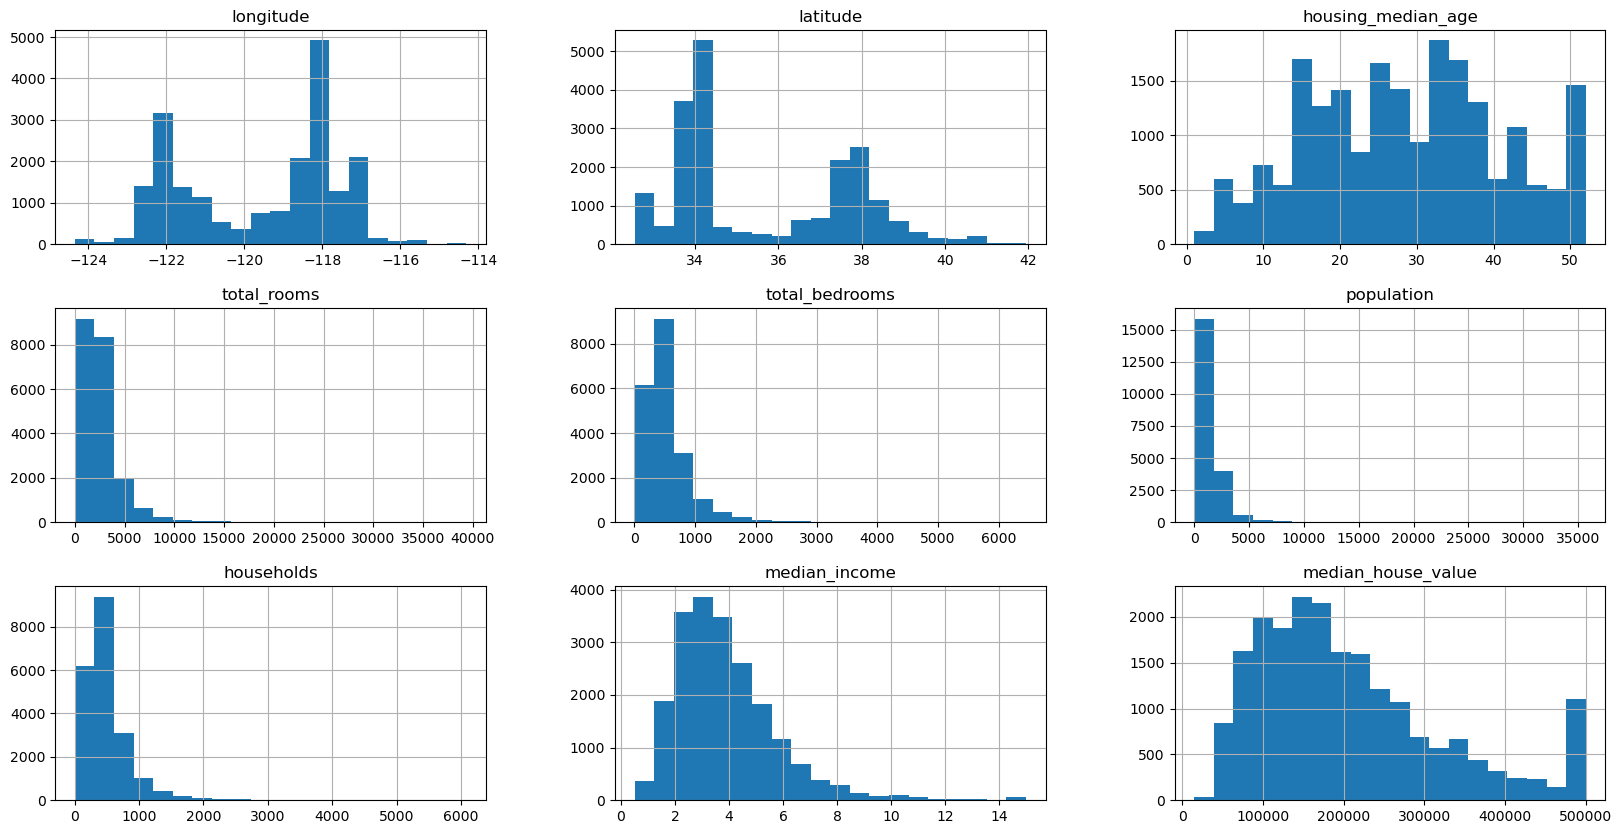

In [3]:
#Visualize the features with any relevant plots to understand the distribution of data
numeric_features = housing_df.select_dtypes(include=[np.number])

numeric_features.hist(bins=20, figsize=(20,10))
plt.show()

#The best way to visualize the distribution of the data is using histograms. We can see the distribution for all columns with numeric attributes.

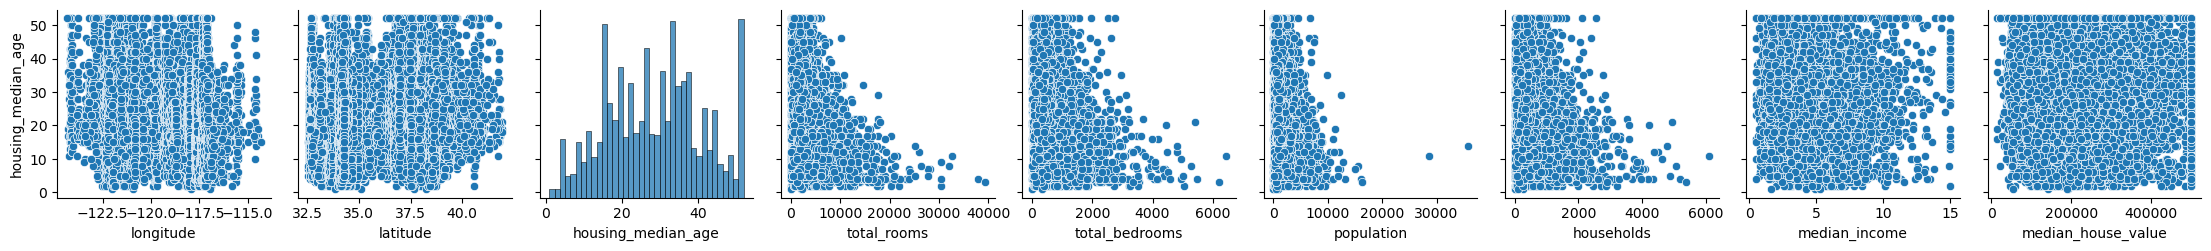

In [4]:
#Target variable with respect to other features
sns.pairplot(housing_df, x_vars=numeric_features.columns, y_vars=['housing_median_age'])
plt.show()
#The pairplot is showing scatter plots for the target variable against each numeric feature.

<AxesSubplot:>

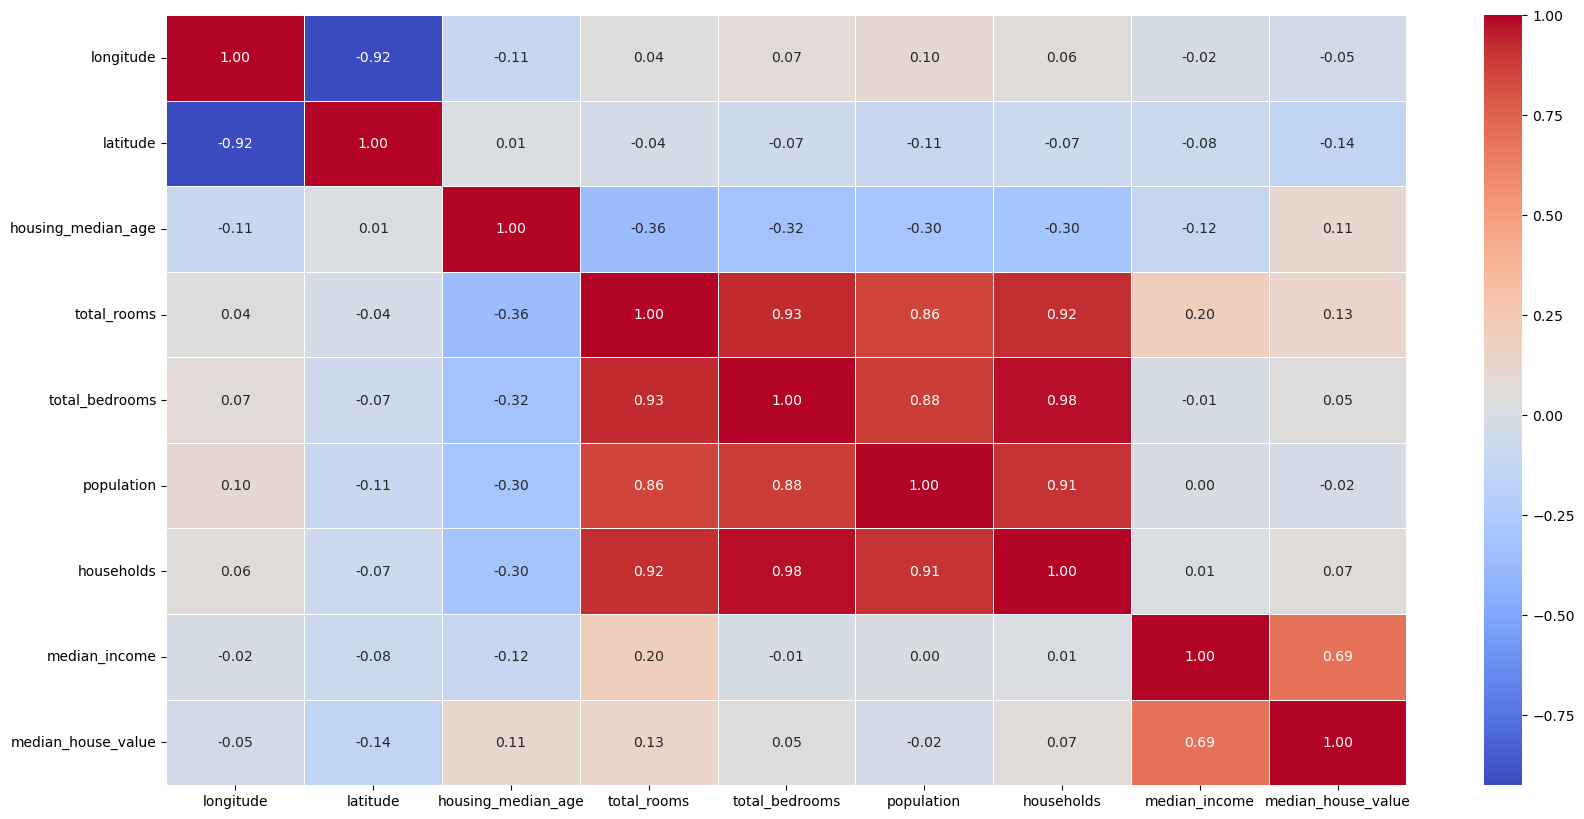

In [5]:
#Correlation matrix
correlation_mat = housing_df.corr()

#Heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(correlation_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
#The heatmap is showing the correlation matrix of numeric features. Strong correlations between features may impact the performance of machine leraning model.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [6]:
def detect_outliers(data, features):
    outliers = []
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers.extend(feature_outliers.index)
    return list(set(outliers))

numeric_features = housing_df.select_dtypes(include=[np.number]).columns

outliers = detect_outliers(housing_df, numeric_features)
len(outliers)

# I chose the IQR method because it is robust and less sensitive to extreme values than other methods like Z-score.

2978

## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

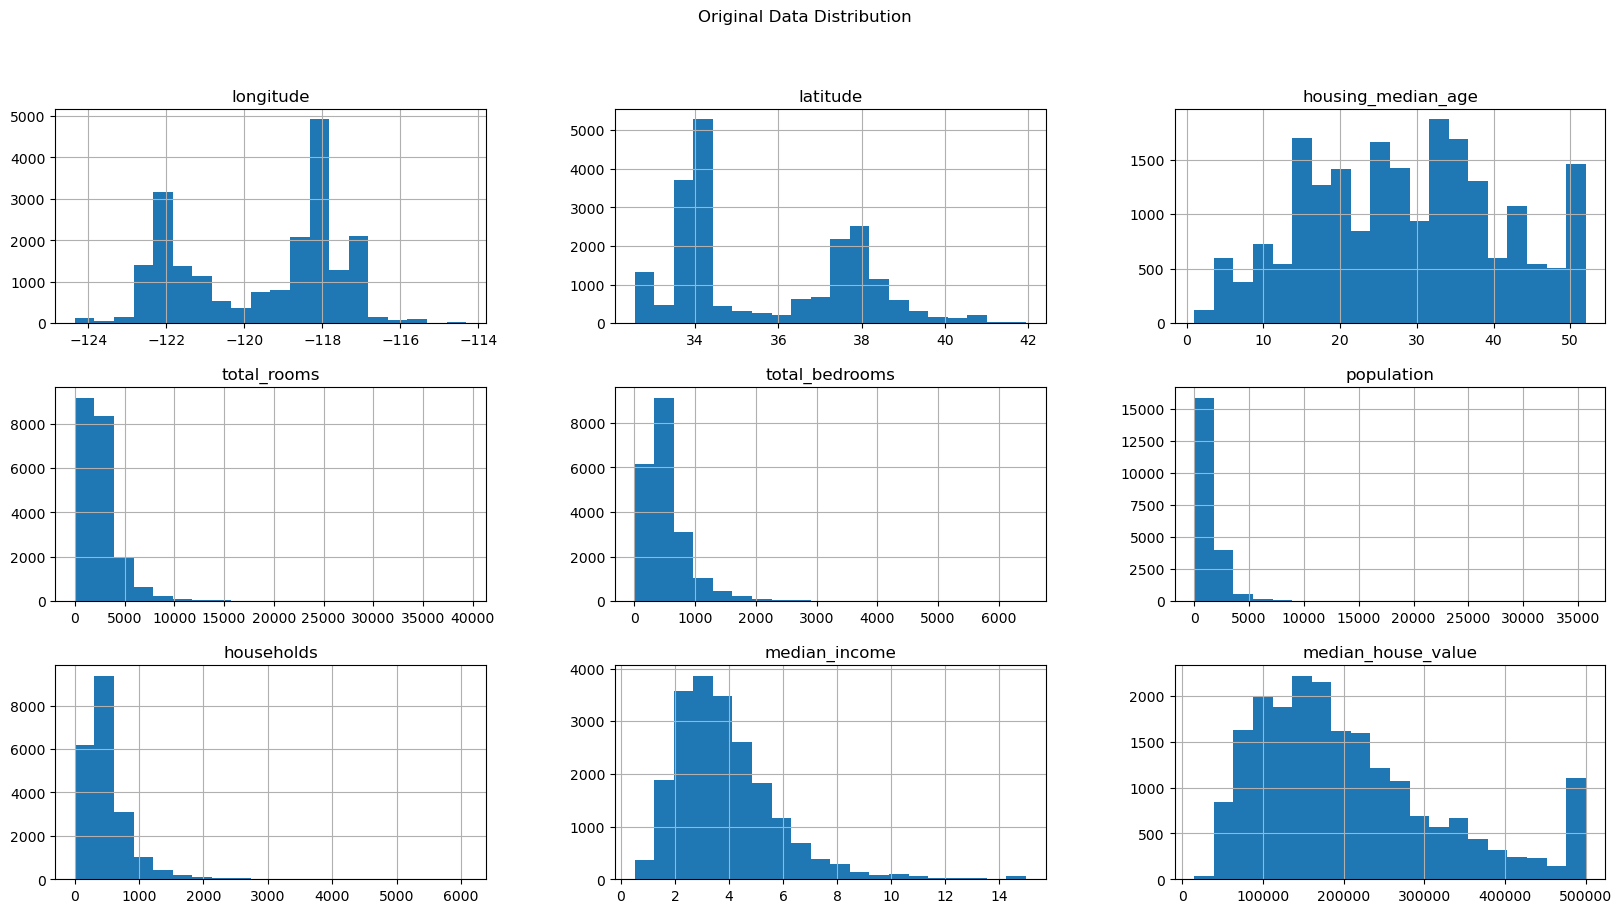

In [7]:
#1:Copy 
housing_df_original = housing_df.copy()
#Checkpoint for baseline comparison
housing_df_original[numeric_features].hist(bins=20, figsize=(20, 10))
plt.suptitle('Original Data Distribution')
plt.show()

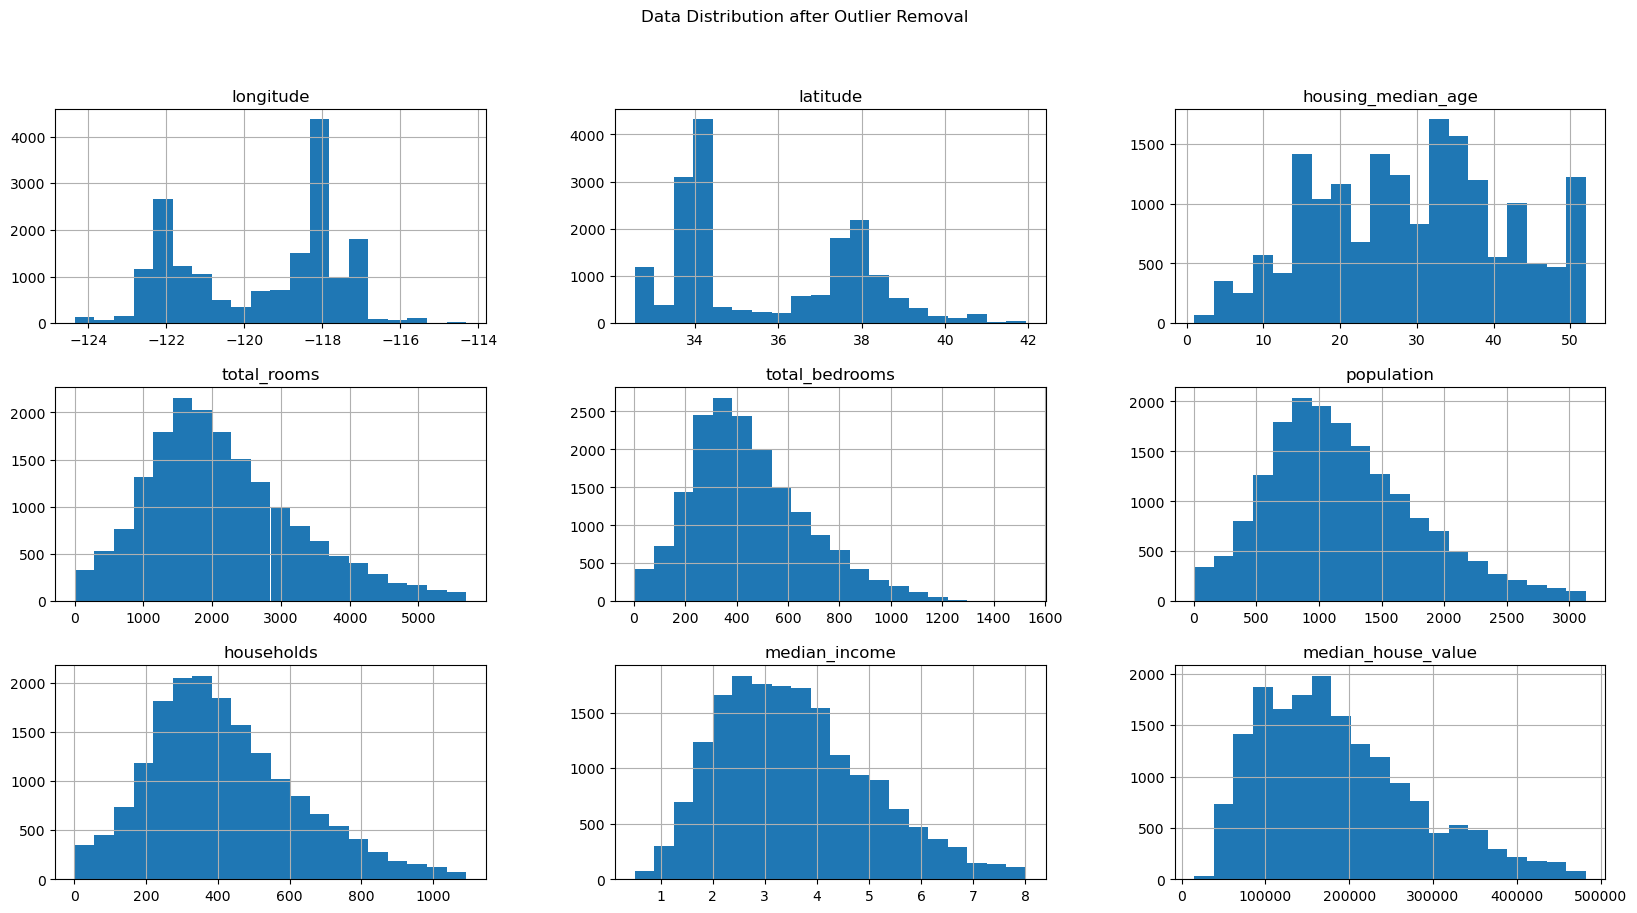

In [8]:
#2:Remove outliers
housing_df_outliers_removed = housing_df.drop(outliers, axis=0)

#Show plots after removal
housing_df_outliers_removed[numeric_features].hist(bins=20, figsize=(20, 10))
plt.suptitle('Data Distribution after Outlier Removal')
plt.show()

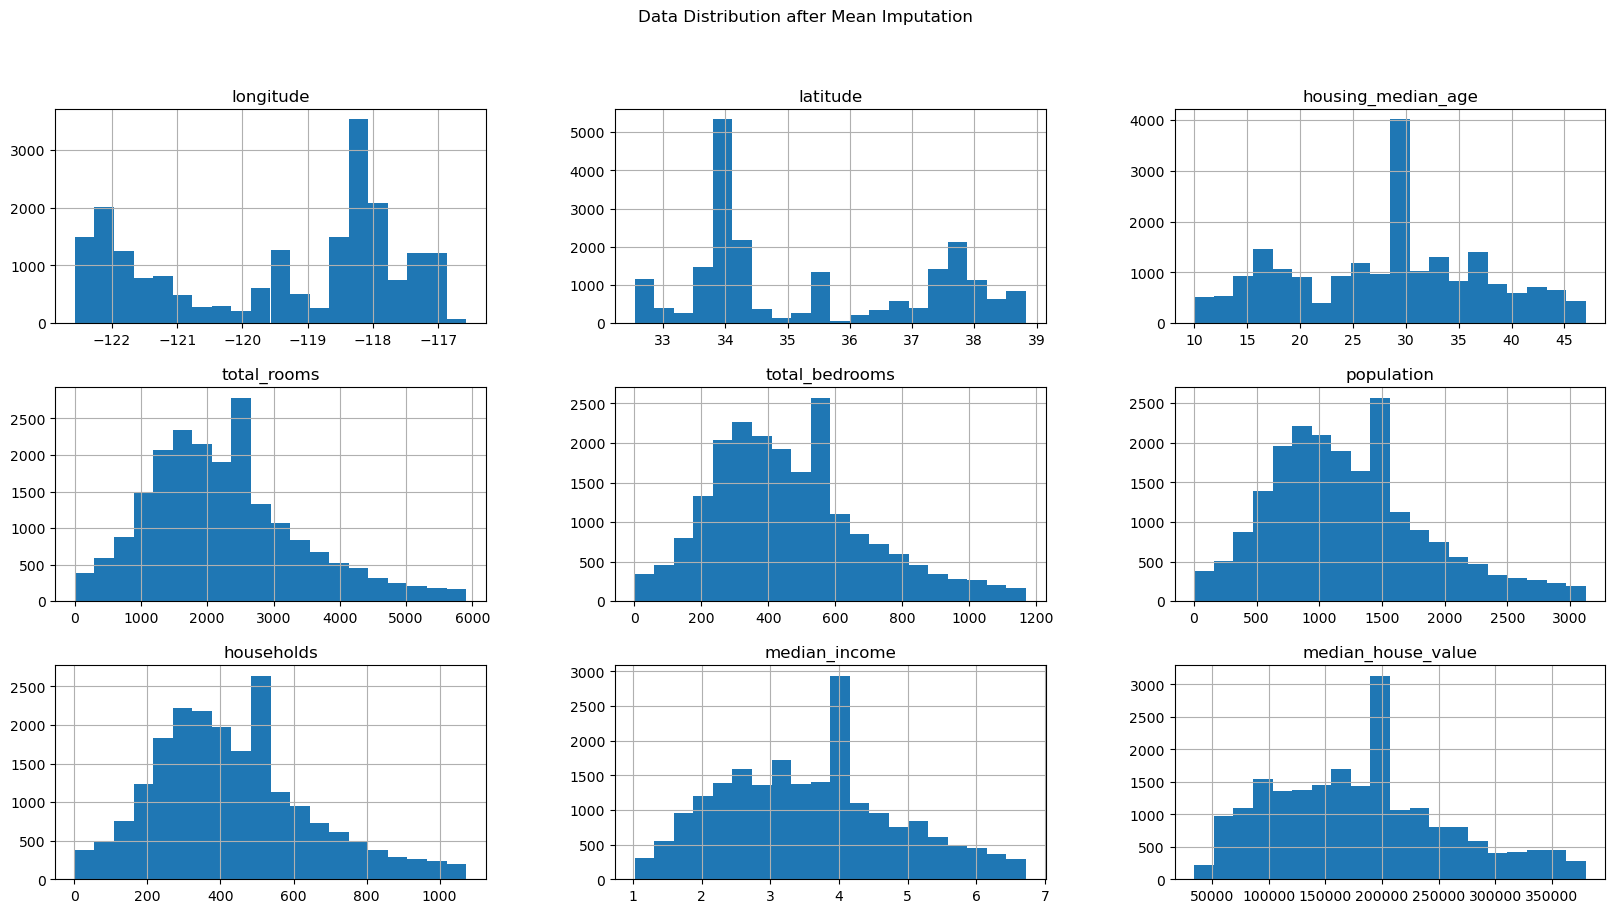

In [9]:
#3: Mean Imputation
housing_df_mean_imputed = housing_df.copy()

housing_df_mean_imputed[numeric_features] = housing_df_mean_imputed[numeric_features].apply(
    lambda x: x.mask((x - x.mean()).abs() > 1.5 * x.std(), x.mean())
)

#Mode Imputation
categorical_features = housing_df.select_dtypes(include=[object]).columns

for feature in categorical_features:
    mode_value = housing_df[feature].mode().iloc[0]
    housing_df_mean_imputed[feature] = housing_df_mean_imputed[feature].fillna(mode_value)


housing_df_mean_imputed[numeric_features].hist(bins=20, figsize=(20, 10))

plt.suptitle('Data Distribution after Mean Imputation')
plt.show()


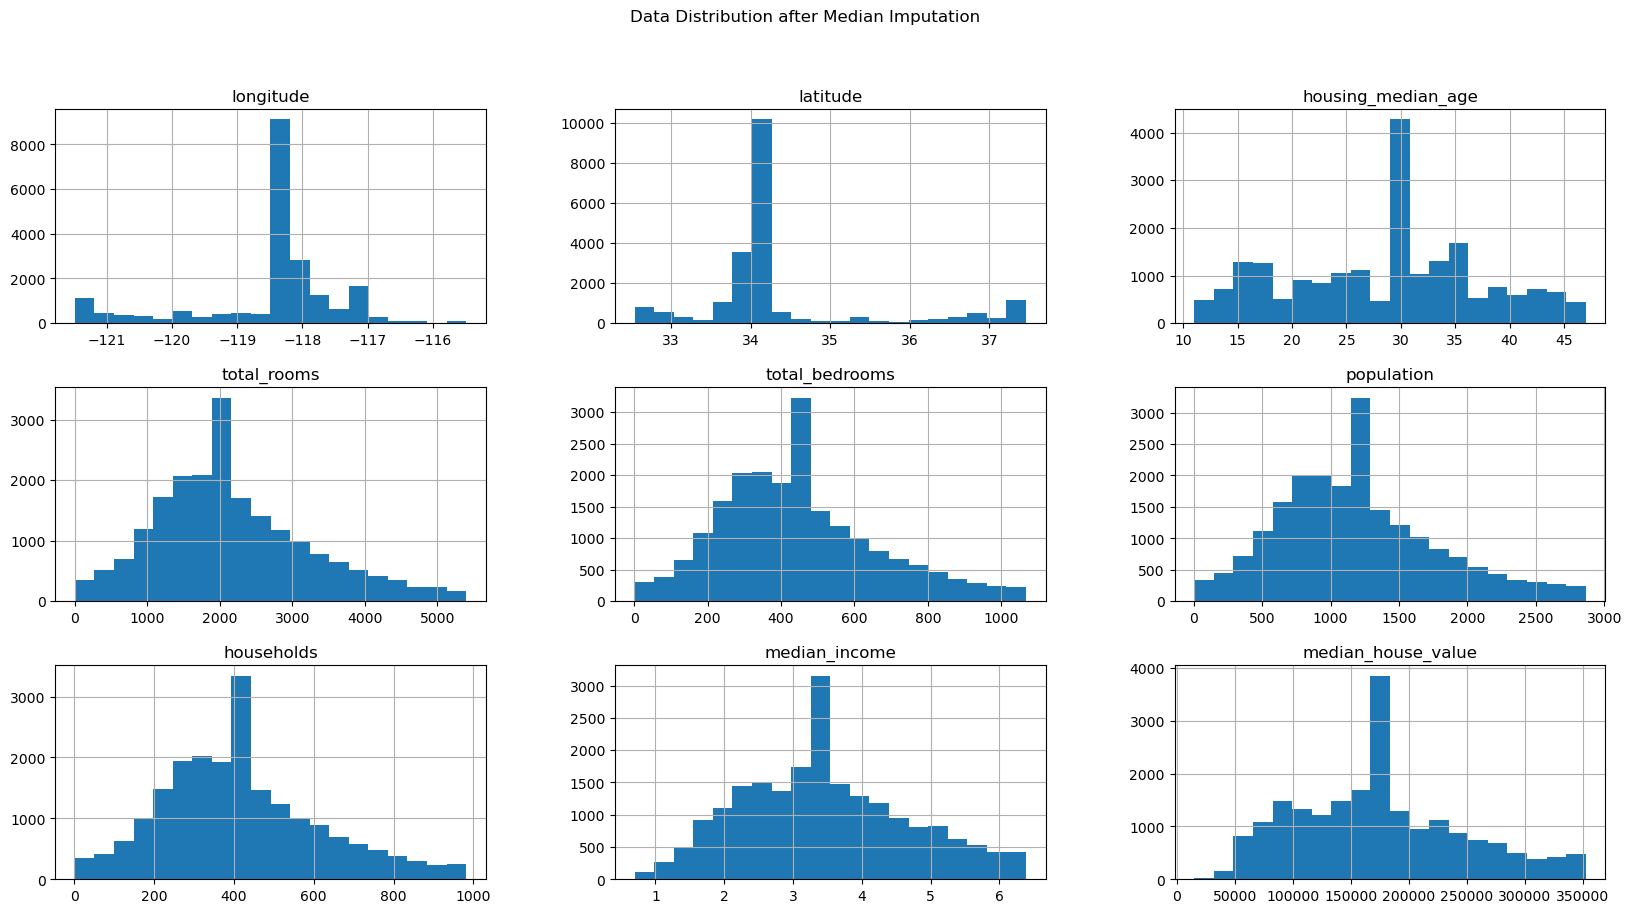

In [10]:
#4: Median Imputation 
housing_df_median_imputed = housing_df.copy()
housing_df_median_imputed[numeric_features] = housing_df_median_imputed[numeric_features].apply(
    lambda x: x.mask((x - x.median()).abs() > 1.5 * x.std(), x.median())
)

#Mode Imputation
categorical_features = housing_df.select_dtypes(include=[object]).columns

for feature in categorical_features:
    mode_value = housing_df[feature].mode().iloc[0]
    housing_df_median_imputed[feature] = housing_df_median_imputed[feature].fillna(mode_value)


housing_df_median_imputed[numeric_features].hist(bins=20, figsize=(20, 10))

plt.suptitle('Data Distribution after Median Imputation')
plt.show()


## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [30]:

ordinal_feature = 'ocean_proximity'

order_mapping = {'NEAR BAY': 1, 'NEAR OCEAN': 2, 'ISLAND': 3, 'INLAND': 4, '<1H OCEAN': 5}

#Encode for all datasets
housing_df_encoded = housing_df.copy()
housing_df_encoded[ordinal_feature] = housing_df_encoded[ordinal_feature].map(order_mapping)

housing_df_o_r_encoded = housing_df_outliers_removed.copy()
housing_df_o_r_encoded[ordinal_feature] = housing_df_outliers_removed[ordinal_feature].map(order_mapping)

housing_df_mean_imputed_encoded = housing_df_mean_imputed.copy()
housing_df_mean_imputed_encoded[ordinal_feature] = housing_df_mean_imputed[ordinal_feature].map(order_mapping)

housing_df_median_imputed_encoded = housing_df_median_imputed.copy()
housing_df_median_imputed_encoded[ordinal_feature] = housing_df_median_imputed[ordinal_feature].map(order_mapping)


housing_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [17]:
np.random.seed(42)

randomized_indices = np.random.permutation(len(housing_df))
housing_df_shuffled = housing_df_encoded.iloc[randomized_indices]

#Ratios
train_ratio = 0.7
test_ratio = 0.3

train_size = int(len(housing_df) * train_ratio)
test_size = int(len(housing_df) * test_ratio)

housing_train = housing_df_shuffled.head(train_size)
housing_test = housing_df_shuffled.tail(test_size)

print(housing_train.shape)
print(housing_test.shape)

(14447, 10)
(6192, 10)


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knn_regression_analysis(X_train, y_train, X_test, y_test, dataset_name):
    k_values = range(1,31)
    mse_values = []

    for k in k_values:
        # kNN regression model
        knn_model = KNeighborsRegressor(n_neighbors=k)
        
        # Fit the model 
        knn_model.fit(X_train, y_train)
        
        # Predict the test set
        y_pred = knn_model.predict(X_test)

        #Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

    #Find optimal k
    optimal_k = k_values[mse_values.index(min(mse_values))]    
   
    
    plt.plot(k_values, mse_values, marker= 'o',linestyle='-')
    plt.title(f'MSE vs k for {dataset_name} Dataset')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Squared Error(MSE)')
    plt.show()

    print(f'Optimal k for {dataset_name} Dataset: {optimal_k}')

    optimal_knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
    optimal_knn_model.fit(X_train,y_train)

    #Predict
    y_pred_optimal = optimal_knn_model.predict(X_test)

    # R-squared value for optimal k
    r2_value = r2_score(y_test, y_pred_optimal)
    print(f'R-squared value for the optimal k: {r2_value}\n')

    return mse_values




In [26]:
#Split dataset
X_original = housing_df_encoded.drop('median_house_value', axis=1)
y_original = housing_df_encoded['median_house_value']

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42
)

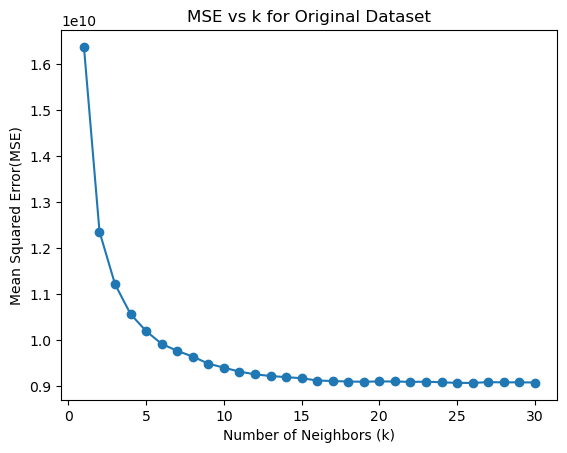

Optimal k for Original Dataset: 26
R-squared value for the optimal k: 0.3092051336483068



[16370791217.956234,
 12354580012.952478,
 11212008631.55297,
 10562289499.285267,
 10193963750.854975,
 9914909849.76949,
 9764778150.333647,
 9638758273.983212,
 9486442337.014454,
 9398855153.040728,
 9312238658.384474,
 9253983102.876287,
 9217413106.81681,
 9193072723.726576,
 9168942726.00958,
 9119544246.943642,
 9108036268.047573,
 9097251953.667126,
 9092560480.532097,
 9099353159.002264,
 9098219007.239498,
 9089679713.369795,
 9093856206.804132,
 9080610707.842123,
 9067495801.914064,
 9066959683.585146,
 9084393941.643272,
 9078816553.256727,
 9080456478.133072,
 9075825267.275852]

In [46]:
#Perform kNN regression
#Fill null values with mean imputation
X_test_original_filled = X_test_original.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
#Original Dataset
mse_values_original = knn_regression_analysis(
    X_train_original, y_train_original, X_test_original_filled , y_test_original, 'Original'
)
mse_values_original

In [44]:
#Outliers Removed 
X_outliers_removed = housing_df_o_r_encoded.drop('median_house_value', axis=1)
y_outliers_removed = housing_df_o_r_encoded['median_house_value']

X_train_outliers_removed, X_test_outliers_removed, y_train_outliers_removed, y_test_outliers_removed = train_test_split(
    X_outliers_removed, y_outliers_removed, test_size=0.3, random_state=42
)
#Fill null values with mean imputation
X_test_outliers_removed_filled = X_test_outliers_removed.apply(lambda x: x.fillna(X_train_outliers_removed.mean()) if x.dtype.kind in 'biufc' else x)

numeric_columns = X_test_outliers_removed_filled.select_dtypes(include=['float64', 'int64']).columns
X_test_outliers_removed_filled[numeric_columns] = X_test_outliers_removed_filled[numeric_columns].apply(lambda x: x.fillna(x.mean()))

print("Number of missing values in testing set:", X_test_outliers_removed_filled.isnull().sum().sum())
#I don't know what the problem is


mse_values_outliers_removed = knn_regression_analysis(
    X_train_outliers_removed, y_train_outliers_removed, X_test_outliers_removed_filled, y_test_outliers_removed, 'Outliers Removed'
)

Number of missing values in testing set: 0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

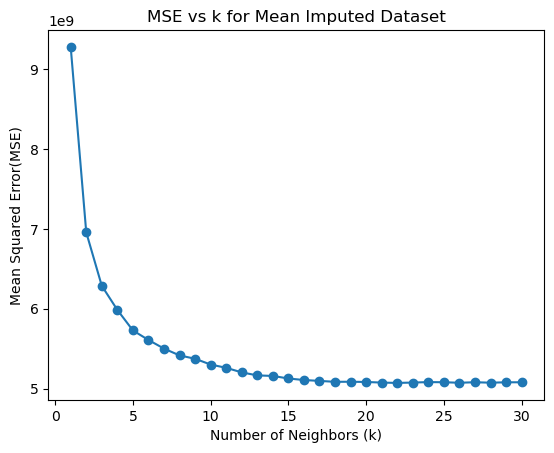

Optimal k for Mean Imputed Dataset: 22
R-squared value for the optimal k: 0.15306022735986036

[9277868466.027025, 6955489489.907398, 6285921135.203937, 5984453099.134107, 5727382427.837798, 5607685562.471886, 5499881629.4268875, 5414500898.570867, 5372518720.191702, 5300041099.615478, 5259073206.974745, 5201869493.879046, 5164275308.5994215, 5157402768.044708, 5125320991.241628, 5106259949.998803, 5095260420.88201, 5083646872.724918, 5084739448.4358835, 5081757174.819425, 5074235593.752413, 5069899220.194833, 5074434701.664497, 5080179703.802271, 5078568130.358232, 5071884472.193497, 5078503016.896145, 5072839654.582269, 5077674599.487395, 5078021506.386051]


In [47]:
#Mean Imput Dataset
from sklearn.impute import SimpleImputer


X_mean_imputed = housing_df_mean_imputed_encoded.drop('median_house_value', axis=1)
y_mean_imputed = housing_df_mean_imputed_encoded['median_house_value']


X_train_mean_imputed, X_test_mean_imputed, y_train_mean_imputed, y_test_mean_imputed = train_test_split(
    X_mean_imputed, y_mean_imputed, test_size=0.3, random_state=42
)
imputer = SimpleImputer(strategy='mean') 
X_train_mean_imputed = pd.DataFrame(imputer.fit_transform(X_train_mean_imputed), columns=X_train_mean_imputed.columns)
X_test_mean_imputed = pd.DataFrame(imputer.transform(X_test_mean_imputed), columns=X_test_mean_imputed.columns)


mse_values_mean_imputed = knn_regression_analysis(
    X_train_mean_imputed, y_train_mean_imputed, X_test_mean_imputed, y_test_mean_imputed, 'Mean Imputed'
)
print(mse_values_mean_imputed)




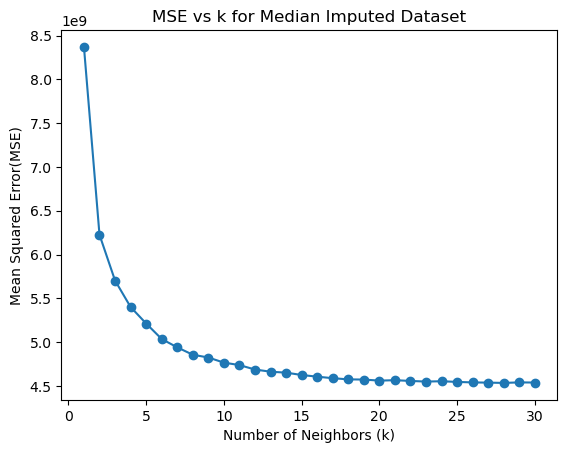

Optimal k for Median Imputed Dataset: 28
R-squared value for the optimal k: 0.12041103759332994

[8370457921.738211, 6225452998.336846, 5703314887.367427, 5401079956.312773, 5212576562.399419, 5035502044.528971, 4940201362.871302, 4855963245.148157, 4824267492.538144, 4765914479.360321, 4737812812.8309145, 4687015692.928774, 4662262969.630008, 4651364556.79795, 4624787134.17172, 4605388418.055978, 4588201673.203567, 4574721590.346235, 4572595836.470514, 4560309092.241691, 4565302928.254898, 4556808925.157597, 4549544258.191419, 4553360197.585425, 4545677764.43934, 4539966434.357058, 4537598120.577893, 4534133915.63423, 4540220854.345461, 4538515772.009963]


In [50]:
#Median Imput Dataset
from sklearn.impute import SimpleImputer

X_median_imputed = housing_df_median_imputed_encoded.drop('median_house_value', axis=1)
y_median_imputed = housing_df_median_imputed_encoded['median_house_value']

X_train_median_imputed, X_test_median_imputed, y_train_median_imputed, y_test_median_imputed = train_test_split(
    X_median_imputed, y_median_imputed, test_size=0.3, random_state=42
)

imputer = SimpleImputer(strategy='median')  
X_train_median_imputed = pd.DataFrame(imputer.fit_transform(X_train_median_imputed), columns=X_train_median_imputed.columns)
X_test_median_imputed = pd.DataFrame(imputer.transform(X_test_median_imputed), columns=X_test_median_imputed.columns)


mse_values_median_imputed = knn_regression_analysis(
    X_train_median_imputed, y_train_median_imputed, X_test_median_imputed, y_test_median_imputed, 'Median Imputed'
)
print(mse_values_median_imputed)

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def linear_regression_analysis(X_train, y_train, X_test, y_test, dataset_name):
    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    y_pred = linear_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    print(f"MSE: {mse}")

    return mse

In [61]:
#Linear Regression for each dataset
#Original Dataset
X_original = housing_df_encoded.drop('median_house_value', axis=1)
y_original = housing_df_encoded['median_house_value']

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.3, random_state=42)

X_test_original_filled = X_test_original.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

mse_original = linear_regression_analysis(X_train_original, y_train_original, X_test_original_filled, y_test_original, 'Original')


MSE: 4856671452.114715


In [66]:
#Outliers Removed Dataset
X_outliers_removed = housing_df_o_r_encoded.drop('median_house_value', axis=1)
y_outliers_removed = housing_df_o_r_encoded['median_house_value']
X_train_outliers_removed, X_test_outliers_removed, y_train_outliers_removed, y_test_outliers_removed = train_test_split(X_outliers_removed, y_outliers_removed, test_size=0.3, random_state=42)

#Fill null values with mean imputation
X_test_outliers_removed_filled = X_test_outliers_removed.apply(lambda x: x.fillna(X_train_outliers_removed.mean()) if x.dtype.kind in 'biufc' else x)
numeric_columns = X_test_outliers_removed_filled.select_dtypes(include=['float64', 'int64']).columns
X_test_outliers_removed_filled[numeric_columns] = X_test_outliers_removed_filled[numeric_columns].apply(lambda x: x.fillna(x.mean()))

print("Number of missing values in testing set:", X_test_outliers_removed_filled.isnull().sum().sum())
#I don't know what the problem is

mse_outliers_removed = linear_regression_analysis(X_train_outliers_removed, y_train_outliers_removed, X_test_outliers_removed_filled, y_test_outliers_removed, 'Outliers Removed')


Number of missing values in testing set: 0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [68]:
#Mean Imputed Dataset 
from sklearn.impute import SimpleImputer

X_mean_imputed = housing_df_mean_imputed_encoded.drop('median_house_value', axis=1)
y_mean_imputed = housing_df_mean_imputed_encoded['median_house_value']
X_train_mean_imputed, X_test_mean_imputed, y_train_mean_imputed, y_test_mean_imputed = train_test_split(X_mean_imputed, y_mean_imputed, test_size=0.3, random_state=42)

#Fill null values with mean imputation
imputer = SimpleImputer(strategy='mean') 
X_train_mean_imputed = pd.DataFrame(imputer.fit_transform(X_train_mean_imputed), columns=X_train_mean_imputed.columns)
X_test_mean_imputed = pd.DataFrame(imputer.transform(X_test_mean_imputed), columns=X_test_mean_imputed.columns)

mse_mean_imputed = linear_regression_analysis(X_train_mean_imputed, y_train_mean_imputed, X_test_mean_imputed, y_test_mean_imputed, 'Mean Imputed')


MSE: 3794389317.7871537


In [69]:
#Median Imputed Dataset
from sklearn.impute import SimpleImputer

X_median_imputed = housing_df_median_imputed_encoded.drop('median_house_value', axis=1)
y_median_imputed = housing_df_median_imputed_encoded['median_house_value']

X_train_median_imputed, X_test_median_imputed, y_train_median_imputed, y_test_median_imputed = train_test_split(X_median_imputed, y_median_imputed, test_size=0.3, random_state=42)

#Fill null values with median imputation
imputer = SimpleImputer(strategy='median') 
X_train_median_imputed = pd.DataFrame(imputer.fit_transform(X_train_median_imputed), columns=X_train_median_imputed.columns)
X_test_median_imputed = pd.DataFrame(imputer.transform(X_test_median_imputed), columns=X_test_median_imputed.columns)

mse_median_imputed = linear_regression_analysis(X_train_median_imputed, y_train_median_imputed, X_test_median_imputed, y_test_median_imputed, 'Median Imputed')


MSE: 3573281975.7496367


## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

In [ ]:
#For datasets with complex and non-linear relationships kNN perform better.
#Linear Regression is suitable for datasets with simpler and linear relationships.


\< double click and insert answer here \>

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices